<a href="https://colab.research.google.com/github/Azuremis/make_your_first_gan_with_pytorch/blob/master/mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive to read data files
from google.colab import drive
drive.mount("./mount")

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [0]:
# import libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas 
import matplotlib.pyplot as plt

MNIST dataset class

In [0]:
class MnistDataset(Dataset):
  
  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    # mage target (label)
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))  # create target tensor 
    target[label] = 1.0  # using one hot encoding

    # image data (normalise from 0-255 to 0-1)
    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

    # return label, image data and target tensor
    return label, image_values, target

  def plot_image(self, index):
    # visualise image from pixels
    img_arr = self.data_df.iloc[index, 1:].values.reshape(28, 28) 
    plt.title("Label: " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img_arr, interpolation='none', cmap="Blues")
    plt.show()




In [0]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/make_your_first_gan_with_pytorch/mnist_data/mnist_train.csv')

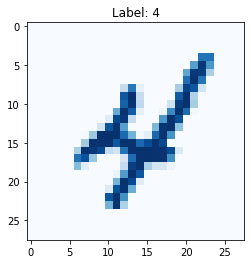

In [6]:
mnist_dataset.plot_image(9)

In [7]:
mnist_dataset[9]

(4,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

Neural network class

In [0]:
# neural network class
class Classifier(nn.Module):

  def __init__(self):
    # initialise parent pytorch class
    super().__init__()

    # setup neural network architecture
    self.model = nn.Sequential(
        nn.Linear( 784, 200), #  fully connected mapping from 784 nodes to 200 nodes
        nn.Sigmoid(),  # apply sigmoid to ouput of 200 nodes
        nn.Linear(200, 10),  # maps 200 nodes to 10 nodes
        nn.Sigmoid()  # apply sigmoid to output of 10 nodes to get final output
    )

    # setup loss function
    self.loss_function = torch.nn.MSELoss()

    # setup optimiser using simple stochastic gradient descent
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # counter and accumulator to track progress
    self.counter = 0
    self.progress = []

    # setup forward method for passing information through network
    def forward(self, inputs):
      # run the model
      return self.model(inputs)

    def train(self, inputs, targets):
      # calculate nn outputs
      outputs = self.forward(inputs)

      # calculate loss
      loss = self.loss_function(outputs, targets)

      # update training progress trackers, accumulate loss val after 10 train ex
      self.counter += 1
      if (self.counter % 10):  
        self.progress.append(loss.item())  # loss.item() unwraps tensor
        
      # indicate speed of training to user
      if (self.counter % 10000 == 0):
        print("counter = ", self.counter)

      # process nn updates
      self.optimiser().zero_grad() # set gradients to zero
      loss.backward() # calculate gradients via backward pass
      self.optimiser.step() # update nn weights using gradients

    def plot_progress(self):
      df = pandas.Dataframe(self.progress, columns[["loss"]])
      df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker=".",
              grid=True, yticks=(0, 0.25, 0.5))


